<a href="https://colab.research.google.com/github/sahansharma/MachineLearning-DataMining/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The fundamentals of learning.

In [ ]:
!pip install graphviz

#The handwritten digits data set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [ ]:
digits = datasets.load_digits()
X, y = digits['data'], digits['target']
n,d = X.shape
print("n=", n)
print("d=", d)

n= 1797
d= 64


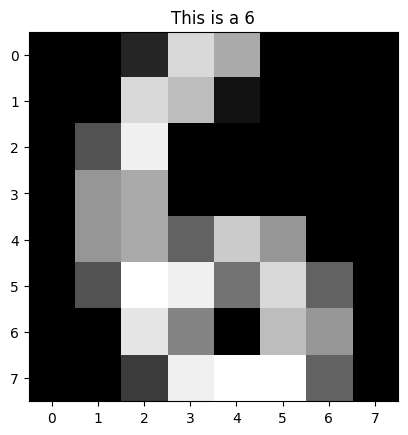

In [ ]:
idx = np.random.randint(0,n)
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' %digits['target'][idx]);

#Exploratory Data Analysis

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

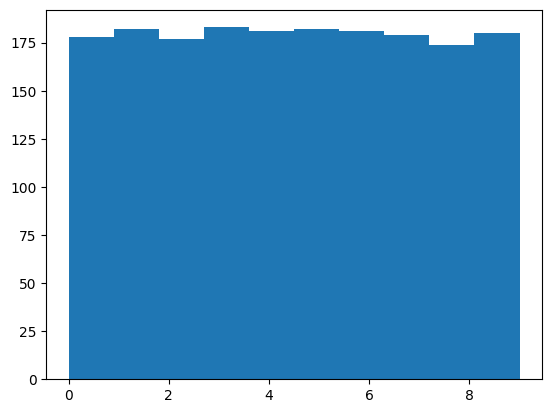

In [ ]:
plt.hist(y)

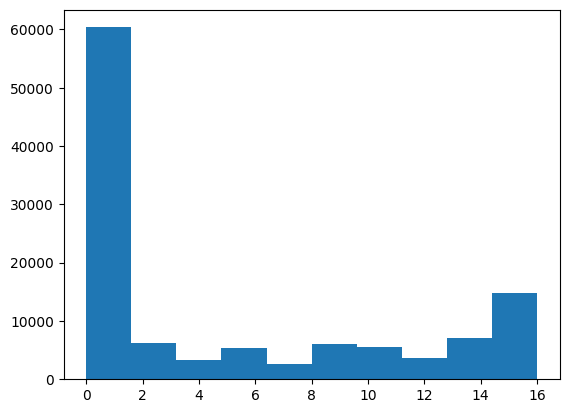

In [ ]:
plt.hist(X.flatten());

##Decision Stump (depth =1)

In [ ]:
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X,y)

DecisionTreeClassifier(max_depth=1)

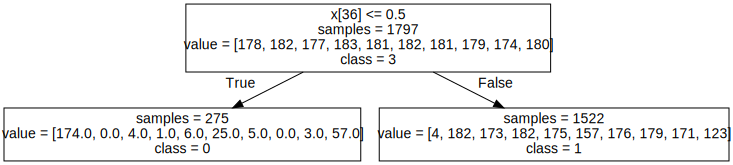

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(stump, out_file=None, class_names=digits.target_names.astype(str), impurity=False))

In [ ]:
yhat = stump.predict(X)
print("Error rate: ", np.sum(yhat!=y)/n)

Error rate:  0.80189204229271


##Decision Tree(depth = 2)

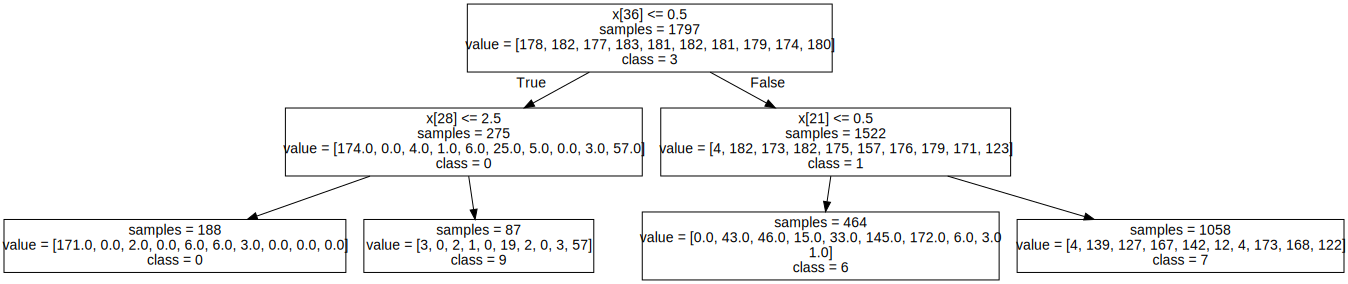

In [ ]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X,y)

graphviz.Source(export_graphviz(tree, out_file=None, class_names=digits.target_names.astype(str), impurity=False))

In [ ]:
yhat = tree.predict(X)
print("Error rate:", np.sum(y!=yhat)/n)

Error rate: 0.6811352253756261


###Change in Error rate wrt depth

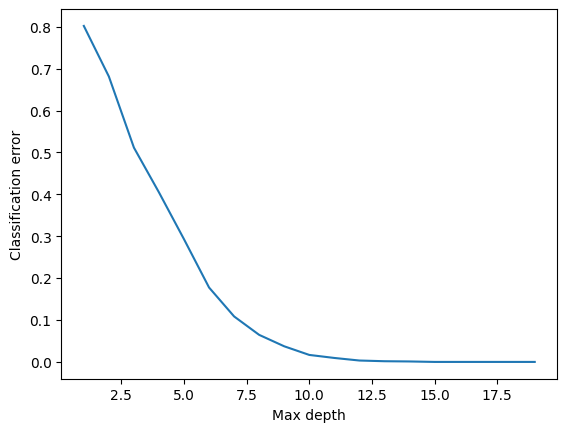

In [ ]:
errors = []
depths = range(1,20)
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X,y)
    yhat = tree.predict(X)
    errors.append(np.mean(y!=yhat))
plt.plot(depths, errors)
plt.xlabel("Max depth")
plt.ylabel("Classification error");

In [ ]:
errors[-1]

np.float64(0.0)

##Overfitting
- With this decision tree, "training accuracy" is 1.
- It perfectly labels the data we used to make the tree.
- We are now given features for 100 new digits.
- What is the "testing accuracy" on the new data?
- How does it do on data not used to make the tree?

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(Xtrain, ytrain)
yhat = tree.predict(Xtrain)
train_err = np.mean(ytrain!=yhat)
print("Training error,", train_err)

Training error, 0.0


In [ ]:
yhat = tree.predict(Xtest)
test_err = np.mean(ytest!=yhat)
print("Testing error,", test_err)

Testing error, 0.14722222222222223


##Training vs. Test Error

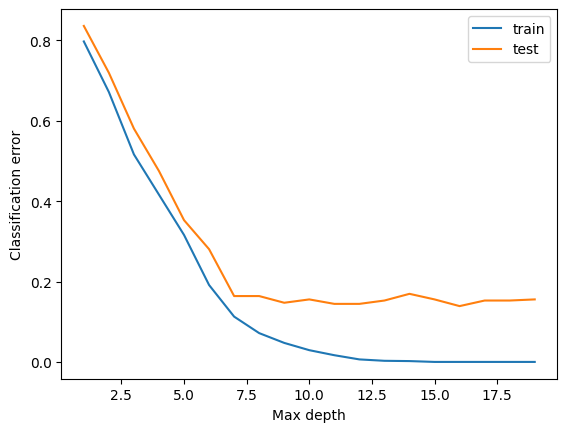

In [ ]:
train_errors = []
test_errors = []
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(Xtrain,ytrain)
    train_errors.append(np.mean(ytrain!=tree.predict(Xtrain)))
    test_errors.append(np.mean(ytest!=tree.predict(Xtest)))
plt.plot(depths, train_errors, label="train")
plt.plot(depths, test_errors, label="test")
plt.xlabel("Max depth")
plt.ylabel("Classification error")
plt.legend();
